<a href="https://colab.research.google.com/github/JManuelRG/ProyectoSARSCoV2/blob/main/Biseccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bisección

# Lectura de la función
Instrucciones:
1. Ejecutar la celda no. 1.
2. Introducir la función a resolver de la forma:
$$f(x)=0$$


| Operación   | Operador    |
| :---        |        ---: |
| Suma        | +           |
| Resta       | -           |
| Multiplicación | *        |
| División       | /        |
| Exponenciación | **        |
| Exponencial|exp()|
|logaritmo natural| log()|
|logaritmo base p|log(x, p)|
|seno|sin(x)|
|coseno|cos(x)|


 Más funciones matemáticas en sympy:
 https://docs.sympy.org/latest/index.html


3. Introducir los límites de graficación
4. Generar el gráfico

Text(value='6.4e-3-212179.3*(x-60)+26289.03*(x-60)**2+2.087174e30*(x-60)**3', description='Función f(x):')

Text(value='-200', description='Límite inferior (a):')

Text(value='500', description='Límite superior (b):')

Button(description='Graficar', style=ButtonStyle())

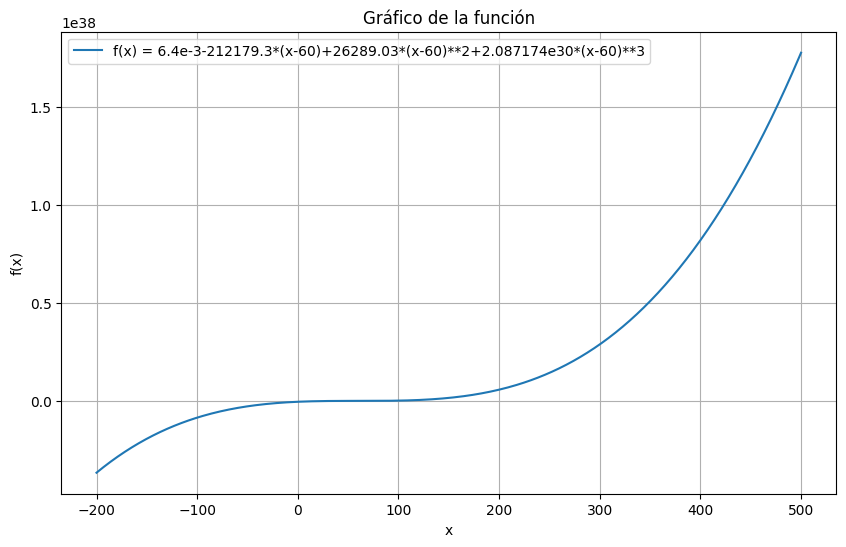

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy import symbols, lambdify, sympify
import ipywidgets as widgets
from IPython.display import display, clear_output

# Función para evaluar la expresión simbólica
def eval_function(expression, x_val):
    x = symbols('x')
    return lambdify(x, expression, 'numpy')(x_val)

# Función para graficar la función
def plot_function(expr_str, a, b):
    try:
        expression = sympify(expr_str)
        a = float(a)
        b = float(b)

        x = np.linspace(a, b, 400)
        y = eval_function(expression, x)

        plt.figure(figsize=(10, 6))
        plt.plot(x, y, label=f'f(x) = {expr_str}')
        plt.title('Gráfico de la función')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid(True)
        plt.legend()
        plt.show()
    except ValueError as e:
        print(f"Error: {str(e)}")
    except Exception as e:
        print(f"Error en la evaluación de la función: {str(e)}")

# Widgets de entrada
func_input = widgets.Text(value='x**2', description='Función f(x):')
a_input = widgets.Text(value='-10', description='Límite inferior (a):')
b_input = widgets.Text(value='10', description='Límite superior (b):')
plot_button = widgets.Button(description="Graficar")

# Función para manejar el evento de clic del botón
def on_plot_button_clicked(b):
    clear_output(wait=True)
    display(func_input, a_input, b_input, plot_button)
    plot_function(func_input.value, a_input.value, b_input.value)

# Asignar el controlador de eventos al botón
plot_button.on_click(on_plot_button_clicked)

# Mostrar los widgets
display(func_input, a_input, b_input, plot_button)


# Método de Bisección

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify, sympify
import ipywidgets as widgets
from IPython.display import display, clear_output
from sympy import *

# Función para evaluar la expresión simbólica
def eval_function(expression, x_val):
    x = symbols('x')
    return lambdify(x, expression, 'numpy')(x_val)

# Implementación del método de bisección
def biseccion(expression, a, b, tol, max_iter):
    resultados = []
    x = symbols('x')
    f = lambdify(x, expression, 'numpy')

    if f(a) * f(b) >= 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos")
    c = a
    for i in range(max_iter):
        c = (a + b) / 2
        resultados.append((i, a, b, c, f(c)))
        if f(c) == 0 or (b - a) / 2 < tol:
            break
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return c, resultados

# Función para actualizar la gráfica y la tabla
def calcular_raiz(expr_str, a, b, tol, max_iter):
    try:
        expression = sympify(expr_str)
        a = float(a)
        b = float(b)
        tol = float(tol)
        max_iter = int(max_iter)

        raiz, resultados = biseccion(expression, a, b, tol, max_iter)

        # Actualizar tabla
        fig, ax = plt.subplots(figsize=(10, 6))
        x = np.linspace(a, b, 400)
        y = eval_function(expression, x)
        ax.plot(x, y, label="f(x)")
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(raiz, color='r', linestyle='--', label=f'Raíz aprox: {raiz:.6f}')
        ax.legend()
        ax.tick_params(axis='both', labelsize=16)
        ax.set_title('Método de Bisección', fontsize=18)
        ax.set_xlabel('x', fontsize=16)
        ax.set_ylabel('f(x)', fontsize=16)

        # Añadir texto que marque la solución
        ax.text(raiz, 0, f'  x = {raiz:.6f}', fontsize=16, verticalalignment='bottom', color='red')

        plt.show()

        # Mostrar resultados en tabla
        display_resultados(resultados)

    except ValueError as e:
        print(f"Error: {str(e)}")
    except Exception as e:
        print(f"Error en la evaluación de la función: {str(e)}")

def display_resultados(resultados):
    from IPython.display import HTML, display
    html = "<table><tr><th>Iteración</th><th>a</th><th>b</th><th>c</th><th>f(c)</th></tr>"
    for res in resultados:
        html += f"<tr><td>{res[0]}</td><td>{res[1]:.6f}</td><td>{res[2]:.6f}</td><td>{res[3]:.6f}</td><td>{res[4]:.6f}</td></tr>"
    html += "</table>"
    display(HTML(html))

# Widgets de entrada
func_input = widgets.Text(value='x**3 - x - 2', description='Función f(x):')
a_input = widgets.Text(value='-3', description='a:')
b_input = widgets.Text(value='3', description='b:')
tol_input = widgets.Text(value='0.001', description='Tolerancia:')
max_iter_input = widgets.Text(value='50', description='Máx. Iteraciones:')
calc_button = widgets.Button(description="Calcular")

# Función para manejar el evento de clic del botón
def on_calc_button_clicked(b):
    clear_output(wait=True)
    display(func_input, a_input, b_input, tol_input, max_iter_input, calc_button)
    calcular_raiz(func_input.value, a_input.value, b_input.value, tol_input.value, max_iter_input.value)

# Asignar el controlador de eventos al botón
calc_button.on_click(on_calc_button_clicked)

# Mostrar los widgets
display(func_input, a_input, b_input, tol_input, max_iter_input, calc_button)


Text(value='6.4e-3-212179.3*(x-60)+26289.03*(x-60)**2+2.087174e30*(x-60)**3', description='Función f(x):')

Text(value='300', description='a:')

Text(value='400', description='b:')

Text(value='0.001', description='Tolerancia:')

Text(value='50', description='Máx. Iteraciones:')

Button(description='Calcular', style=ButtonStyle())

Error: f(a) y f(b) deben tener signos opuestos
